#**How does generation influence the perception of electric cars?**
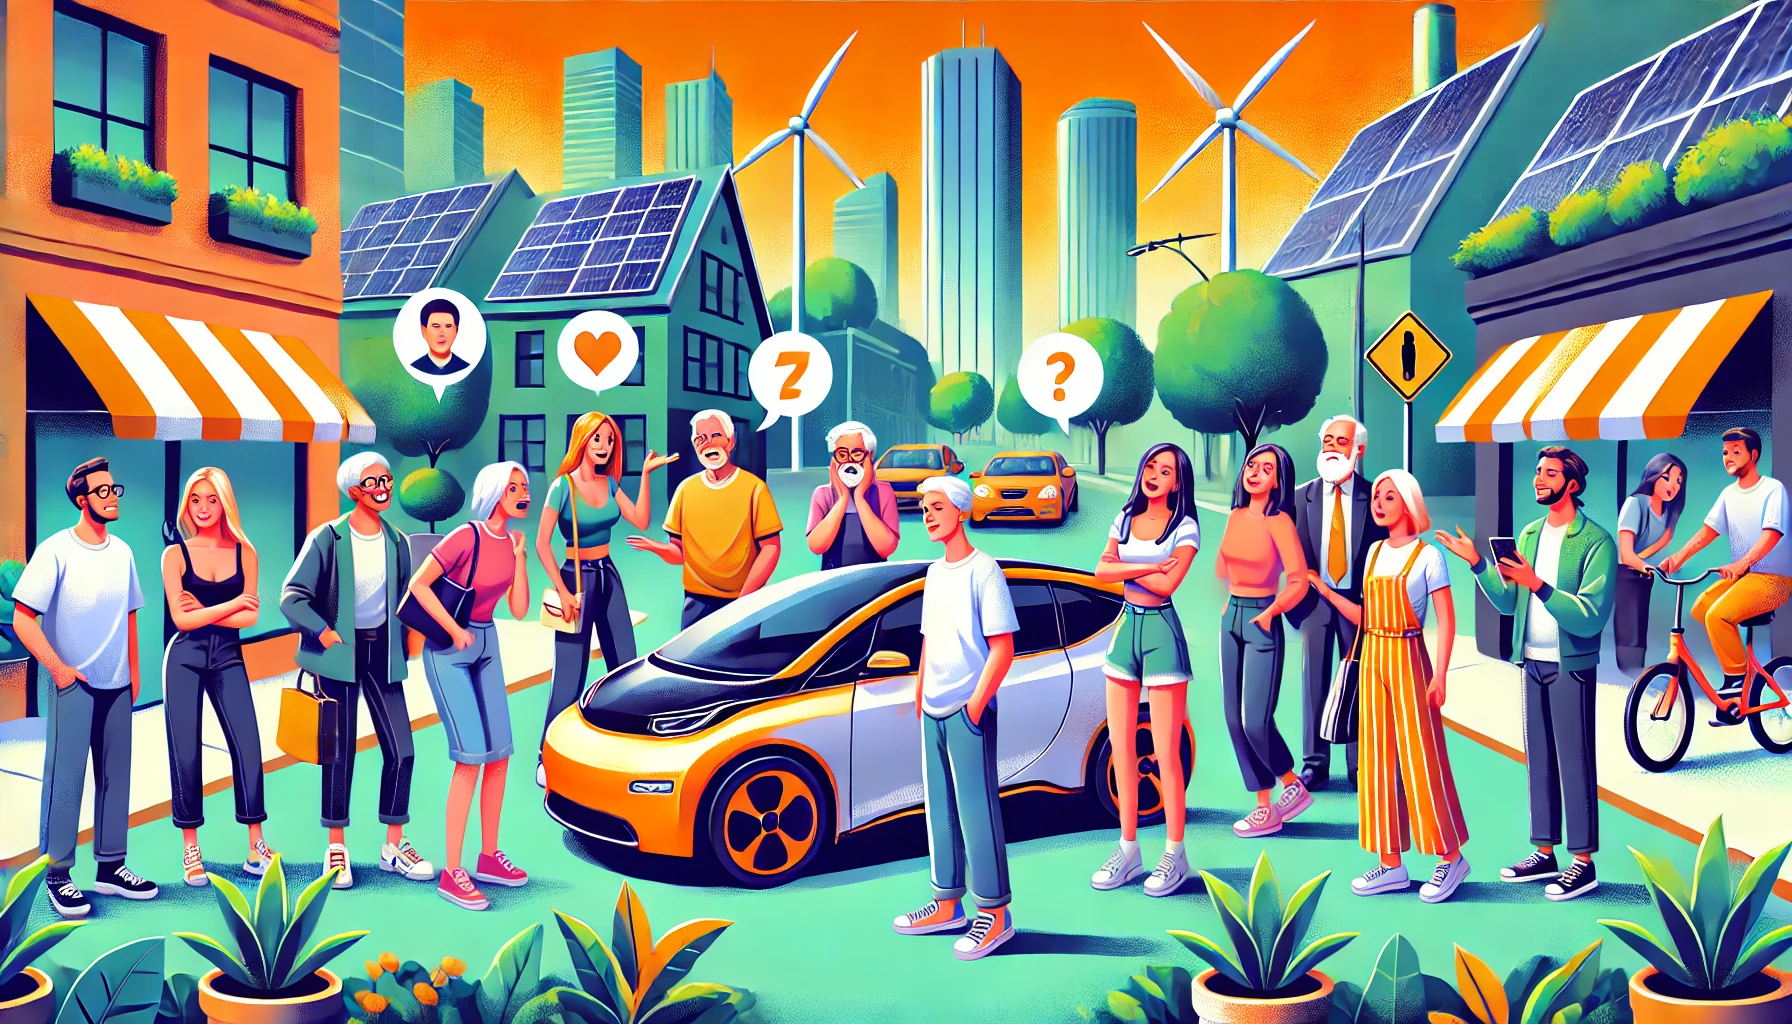

#Project Overview and Objective

##Objective:
The purpose of this project is to analyze the perception of electric cars across different generations. We aim to answer the key question: "How does generation influence the perception of electric cars?" Specifically, we hypothesize that Generation Z has a more positive perception of electric cars compared to other age groups.

#Steps to Achieve the Analysis
To address the objective, we'll go through the following steps in the project:



1.   **Setup and Data Loading:** We’ll start by setting up the environment with necessary libraries and loading the CSV data to ensure everything is ready for analysis.
2.   **Data Cleaning and Preprocessing:**
Here, we’ll examine the dataset for issues like missing values, inconsistent formatting, and extra whitespace in column names. This step ensures our data is clean and standardized for accurate analysis.
3. **Generation Segmentation:**
We’ll create a new column to categorize respondents into generational groups (e.g., Generation Z, Millennials) based on their age group. This segmentation allows us to make generational comparisons.
4. **Extracting Relevant Data for Analysis:**
We’ll select only the relevant columns related to perception and attitudes for analysis. Dropping irrelevant columns helps to focus on key information.
5. **Data Transformation for Quantitative Analysis:**
Certain survey responses (e.g., "Yes" or "No" answers) will be converted into numerical values to allow statistical comparisons.
6. **Calculating Averages by Generation:**
For each generation, we’ll calculate average values for perception scores and likelihood to consider buying an electric car. This step provides numerical insights into how perceptions differ among generations.
7. **Visualization of Results:**
Finally, we’ll visualize the differences in perception and attitudes across generations using bar charts. This step will clearly display trends and help answer the initial research question.
8. **Conclusion and Interpretation:**
Based on the visualizations and calculated metrics, we’ll interpret the findings to determine if Generation Z has a more positive perception of electric cars.


#Step 1: Setting Up the Environment and Importing Data
In this step, we’ll import the necessary libraries for data analysis and visualization. This is essential because each library has a specific role in handling and visualizing our data:

pandas: Used for loading, cleaning, and manipulating our survey data.

seaborn: Allows us to create clear and aesthetically pleasing visualizations.

matplotlib.pyplot: Provides additional customization options for our plots.

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set default plot size for clarity
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [2]:
# Load the CSV file
file_path = '/content/Electric cars perception survey (válaszok) - A(z) 1. lapon lévő válaszok.csv'
data = pd.read_csv("Electric cars perception survey (válaszok) - A(z) 1. lapon lévő válaszok.csv")

# Display the first few rows of the data to verify it loaded correctly
data.head()


,Date and Time of Survey happen,How old are you?,What is your gender?,How familiar are you with electric cars and their phenomenon?,What is your main source of information about electric cars?,Have you ever been a passenger in an electric car?,Have you ever driven an electric car?,How likely are you to consider purchasing an electric car in the next 5 years?,"If you don’t currently own an electric car, what’s the main reason?",What is your general perception of electric cars?,What factors do you think influence your view on electric cars the most?,Do you believe electric cars are essential for combating climate change?,"If yes, how significant is the impact of electric vehicles on the enviroment?",What do you think would make electric cars more appealing to your generation?,Do you feel that electric cars fit well with your lifestyle and daily needs?,Do you think electric cars will become the primary type of vehicle in the next 10 years?,Any additional comments on electric cars and their future?
0,2024.10.24. 17:22:58,28-43,Male,1.0,NaN,NaN,Yes,3,Range anxiety (limited driving distance),2,Technological advancements,Yes,NaN,Increased range (longer battery life),NaN,NaN,"Battery technology revolution, Grid integratio..."
1,2024.10.24. 18:09:21,12-17,Male,2.0,NaN,NaN,Yes,1,"Limited charging infrastructure, Range anxiety...",2,Technological advancements,Yes,NaN,"Developed charging infrastructure, Increased r...",NaN,NaN,NaN
2,2024.10.31. 18:05:32,12-17,Female,4.0,Social media,Yes,No,2,High price,3,"Environmental concerns, Technological advancem...",Yes,2.0,Greater availability of different models and s...,Yes,Yes,NaN
3,2024.10.31. 18:05:34,12-17,Female,4.0,Social media,Yes,Yes,5,"Limited charging infrastructure, Lack of infor...",1,Price,No,5.0,Faster charging times,No,Yes,NaN
4,2024.10.31. 18:09:06,12-17,Male,4.0,"News articles, Social media",No,No,5,no driving license,3,"Environmental concerns, Technological advancem...",No,NaN,"Developed charging infrastructure, Greater ava...",NaN,Yes,NaN


#Step 2: Data Cleaning and Preprocessing
In this step, we’ll clean up the data by removing any extra spaces from column names. This ensures consistency when referring to columns in our code, especially if some columns have leading or trailing spaces. We’ll also quickly review the column names to make sure they’re what we expect.

In [3]:
# Remove any extra spaces in column names
data.columns = data.columns.str.strip()

# Display column names to verify they are clean and consistent
print(data.columns)

Index(['Date and Time of Survey happen', 'How old are you?',
       'What is your gender?',
       'How familiar are you with electric cars and their phenomenon?',
       'What is your main source of information about electric cars?',
       'Have you ever been a passenger in an electric car?',
       'Have you ever driven an electric car?',
       'How likely are you to consider purchasing an electric car in the next 5 years?',
       'If you don’t currently own an electric car, what’s the main reason?',
       'What is your general perception of electric cars?',
       'What factors do you think influence your view on electric cars the most?',
       'Do you believe electric cars are essential for combating climate change?',
       'If yes, how significant is the impact of electric vehicles on the enviroment?',
       'What do you think would make electric cars more appealing to your generation?',
       'Do you feel that electric cars fit well with your lifestyle and daily needs?',


#Step 3: Generation Segmentation
In this step, we’ll categorize respondents into generational groups (such as Generation Z and Millennials) based on their age group. This segmentation will help us compare the perceptions of electric cars across different generations.

In [4]:
# Define a function to categorize age groups into generations
def categorize_generation(age_group):
    if age_group in ['12-17', '18-25']:
        return 'Generation Z'
    elif age_group in ['28-43']:
        return 'Millennials'
    elif age_group in ['44-57']:
        return 'Generation X'
    elif age_group in ['58-73']:
        return 'Baby Boomers'
    else:
        return 'Other'

# Apply the categorization function to create a new column 'Generation'
data['Generation'] = data['How old are you?'].apply(categorize_generation)

# Display the first few rows to check that the new column has been added correctly
data[['How old are you?', 'Generation']].head()

,How old are you?,Generation
0,28-43,Millennials
1,12-17,Generation Z
2,12-17,Generation Z
3,12-17,Generation Z
4,12-17,Generation Z


#Step 4: Extracting Relevant Data for Analysis
In this step, we’ll select only the columns relevant to our analysis, focusing on the generational group, perception of electric cars, likelihood of purchasing in the next 5 years, and belief in their importance for climate change. This allows us to concentrate on the data needed for answering our research question.

In [5]:
# Select columns relevant to the analysis
selected_columns = [
    'Generation',
    'What is your general perception of electric cars?',
    'How likely are you to consider purchasing an electric car in the next 5 years?',
    'Do you believe electric cars are essential for combating climate change?'
]

# Filter data to include only the selected columns and remove rows with missing values
filtered_data = data[selected_columns].dropna()

# Display the filtered data to verify
filtered_data.head()

,Generation,What is your general perception of electric cars?,How likely are you to consider purchasing an electric car in the next 5 years?,Do you believe electric cars are essential for combating climate change?
0,Millennials,2,3,Yes
1,Generation Z,2,1,Yes
2,Generation Z,3,2,Yes
3,Generation Z,1,5,No
4,Generation Z,3,5,No


#Step 5: Data Transformation for Quantitative Analysis
In this step, we’ll convert specific responses, like "Yes" and "No," to numerical values. This conversion will allow us to calculate meaningful averages for each generation, making it easier to compare their beliefs quantitatively.

In [6]:
# Convert "Do you believe electric cars are essential for combating climate change?" to numeric values
filtered_data['Do you believe electric cars are essential for combating climate change?'] = (
    filtered_data['Do you believe electric cars are essential for combating climate change?'].map({'Yes': 1, 'No': 0})
)

#Step 6: Calculating Averages by Generation
In this step, we’ll calculate the average perception scores and likelihood to consider purchasing electric cars for each generation. This gives us a summary view of how each generation perceives electric cars and their interest in them.

In [7]:
# Calculate the average perception and likelihood scores for each generation
generation_analysis = filtered_data.groupby('Generation').mean()

# Display the calculated averages for each generation
generation_analysis

,What is your general perception of electric cars?,How likely are you to consider purchasing an electric car in the next 5 years?,Do you believe electric cars are essential for combating climate change?
Generation,,,
Generation Z,2.333333,2.708333,0.708333
Millennials,2.541667,2.541667,0.791667
Other,2.600000,3.066667,0.466667


1. **General Perception of Electric Cars:**

*   Generation Z (2.33) has a slightly less positive perception than Millennials (2.54) and the Other age group (2.60).
*   This score suggests that Generation Z, while generally favorable, might not view electric cars as positively as the other generations do.

2. **Likelihood of Considering a Purchase in the Next 5 Years:**

*   Generation Z has an average score of 2.71, which is a bit higher than Millennials' 2.54 but lower than the Other group at 3.07.
*   This indicates that Generation Z is somewhat likely to consider purchasing an electric car, although it’s still not the most enthusiastic group. The "Other" group shows the highest likelihood of considering a purchase, suggesting a stronger interest among older or unclassified respondents.

3. **Belief in Electric Cars’ Importance for Climate Change:**

*   Here, we see that Millennials have the highest belief in the importance of electric cars for combating climate change with an average score of 0.79 (79%).
*   Generation Z has a similar, though slightly lower, belief at 0.71 (71%), indicating that a strong majority in both these groups see electric cars as important for environmental efforts.
*   The Other group, at 0.47 (47%), shows less conviction in electric cars' role in addressing climate change, which might indicate some skepticism or differing priorities.











#Step 7: Visualization of Results
In this step, we’ll create bar charts to visually compare how each generation perceives electric cars. Visualizations help us see trends and differences more clearly than numerical tables, making it easier to interpret the findings.

C:\Users\IRANICA\AppData\Local\Temp\ipykernel_13092\479511659.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\IRANICA\AppData\Local\Temp\ipykernel_13092\479511659.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\IRANICA\AppData\Local\Temp\ipykernel_13092\479511659.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


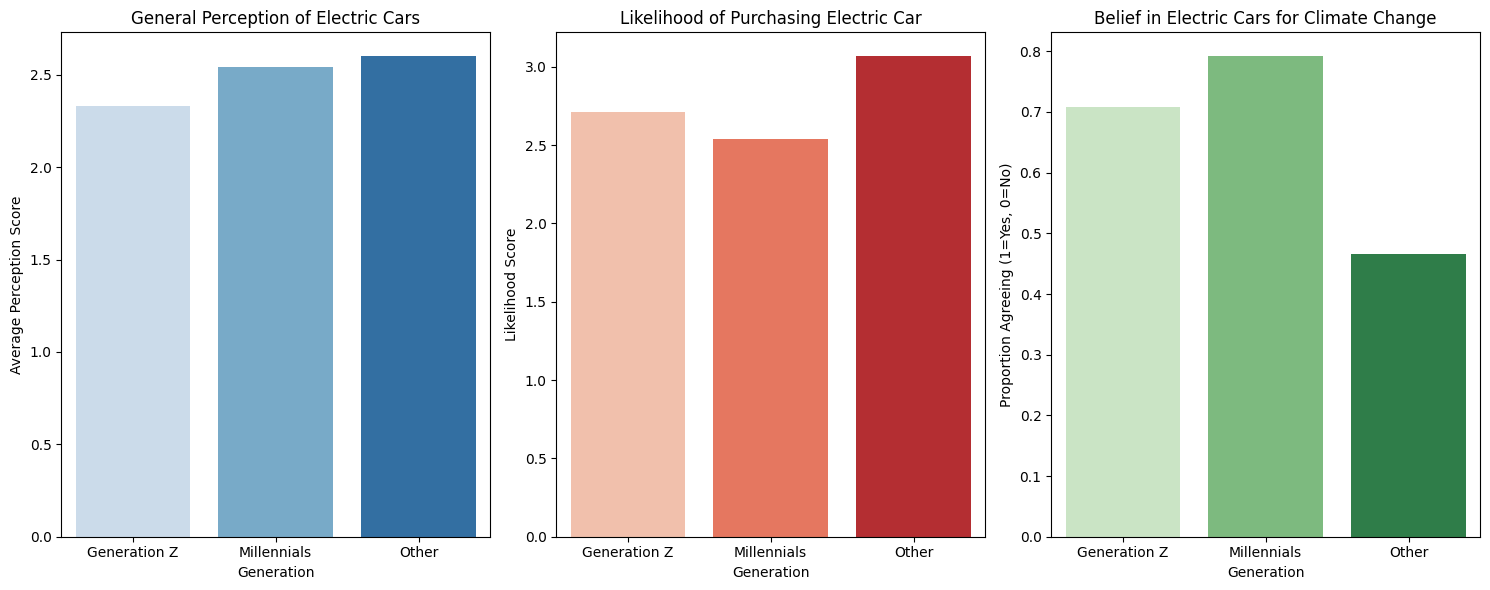

In [ ]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size for better readability
plt.figure(figsize=(15, 6))

# Plot 1: General perception of electric cars by generation with different colors
plt.subplot(1, 3, 1)
sns.barplot(
    x=generation_analysis.index,
    y=generation_analysis['What is your general perception of electric cars?'],
    palette='Blues'  # Use a blue color palette for each bar
)
plt.title('General Perception of Electric Cars')
plt.ylabel('Average Perception Score')
plt.xlabel('Generation')

# Plot 2: Likelihood to consider purchasing an electric car by generation with different colors
plt.subplot(1, 3, 2)
sns.barplot(
    x=generation_analysis.index,
    y=generation_analysis['How likely are you to consider purchasing an electric car in the next 5 years?'],
    palette='Reds'  # Use a red color palette for each bar
)
plt.title('Likelihood of Purchasing Electric Car')
plt.ylabel('Likelihood Score')
plt.xlabel('Generation')

# Plot 3: Belief in electric cars as essential for climate change by generation with different colors
plt.subplot(1, 3, 3)
sns.barplot(
    x=generation_analysis.index,
    y=generation_analysis['Do you believe electric cars are essential for combating climate change?'],
    palette='Greens'  # Use a green color palette for each bar
)
plt.title('Belief in Electric Cars for Climate Change')
plt.ylabel('Proportion Agreeing (1=Yes, 0=No)')
plt.xlabel('Generation')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


#Step 8: Conclusion and Interpretation

**General Perception of Electric Cars**
The first chart shows the average general perception of electric cars across different generations. Generation Z has a slightly lower average perception score compared to Millennials and the Other age group. Millennials and the Other group have similar levels of perception, with the Other group having the highest. This suggests that while all generations generally have a positive view of electric cars, Generation Z may have a slightly less favorable perception than the older groups.


*   **Generation Z has a positive perception of electric cars, but this perception is lower than that of Millennials and the "Other" group.**



For conclusion we can say these charts collectively suggest that while all generations show some level of positivity towards electric cars, Millennials and Generation Z are more aligned in seeing electric cars as beneficial for the environment, while the Other age group shows stronger interest in purchasing, perhaps due to different priorities or purchasing capacity.